In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [41]:
col=['user_id', 'item_id', 'rating', 'timestamp']
df=pd.read_csv('u.data', sep='\t', names=col)
movies=pd.read_csv('Movie_Id_Titles')
df= pd. merge(df, movies, on ='item_id')

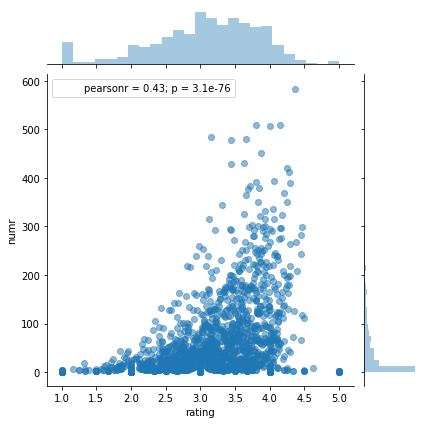

In [42]:
rs=pd.DataFrame(df.groupby('title')['rating'].mean())
rs['numr']=df.groupby('title')['rating'].count()
sns.jointplot(x='rating', y='numr',data= rs, alpha=0.5)

In [55]:
# plt.figure(figsize=(10,6))
# rs['rating'].hist(bins=60)
# rs['numr'].hist(bins=60)
moviemat=df.pivot_table(index='user_id', columns='title', values='rating')
#rs.sort_values('numr', ascending=False) #take the 1st and 5th star wars and liarliar

In [67]:
ss=moviemat.corrwith(moviemat['Star Wars (1977)']).dropna()#similar to starwars
corr_sw=pd.DataFrame(ss, columns=['corr'])
corr_sw=corr_sw.join(rs['numr'])#add number of ratings to chose 
corr_sw[corr_sw['numr']>100].sort_values('corr', ascending=False).head()

,corr,numr
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130


In [71]:
sl=moviemat.corrwith(moviemat['Liar Liar (1997)']).dropna()
corr_sl=pd.DataFrame(sl, columns=['corr'])
corr_sl=corr_sl.join(rs['numr'])
corr_sl[corr_sl['numr']>100].sort_values('corr', ascending=False).head()

,corr,numr
title,,
Liar Liar (1997),1.000000,485
Batman Forever (1995),0.516968,114
"Mask, The (1994)",0.484650,129
Down Periscope (1996),0.472681,101
Con Air (1997),0.469828,137
